<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JSOrtegaB/blob/main/Semana_8/Actividad_Semanal_7_K_means_JuanSebastianOrtegaBriones_A01794327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 8: Actividad Semanal -- 7 Regresiones y K means Notebook 2 
## Ciencia y analítica de datos
### Profesor: María de la Paz Rico Fernández
### Juan Sebastián Ortega Briones A01794327

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [128]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 13.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=28603a5a972501057222debbff039ab75fbd3b9037503f84e1f69c67e9887805
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=3cd213c0ca7eba8be0c1997072b19a6d085fd20768a0a5abebceaf4780014f1b
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn


In [129]:
!pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
! pip install qeds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [190]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [132]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [133]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [135]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

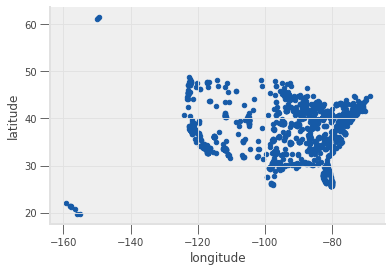

In [136]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [137]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [138]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [139]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [140]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [141]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [142]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

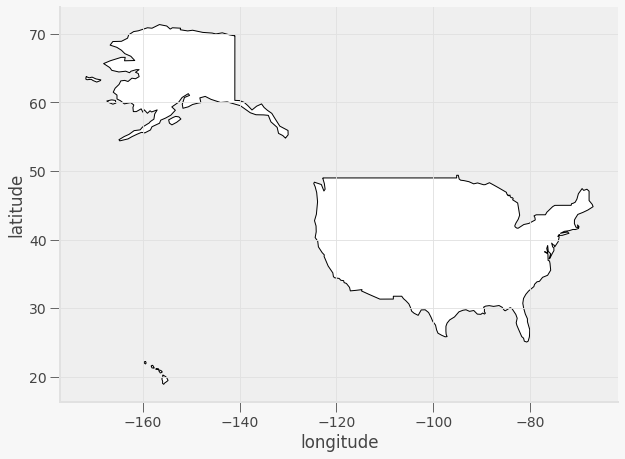

In [143]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

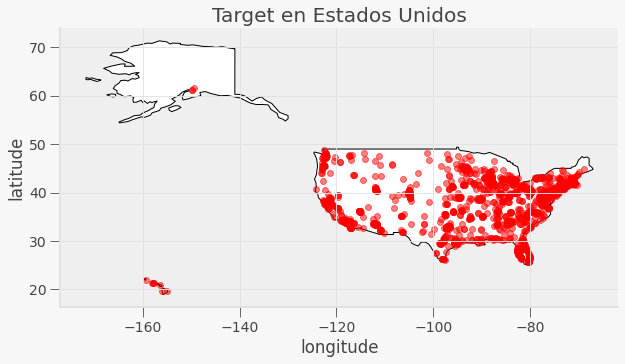

In [144]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [145]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [146]:
wcss=[]

for i in range(1,20):
  kmeans=KMeans(n_clusters=i, max_iter=3000)
  kmeans.fit(gdf[['latitude', 'longitude']])
  wcss.append(kmeans.inertia_)


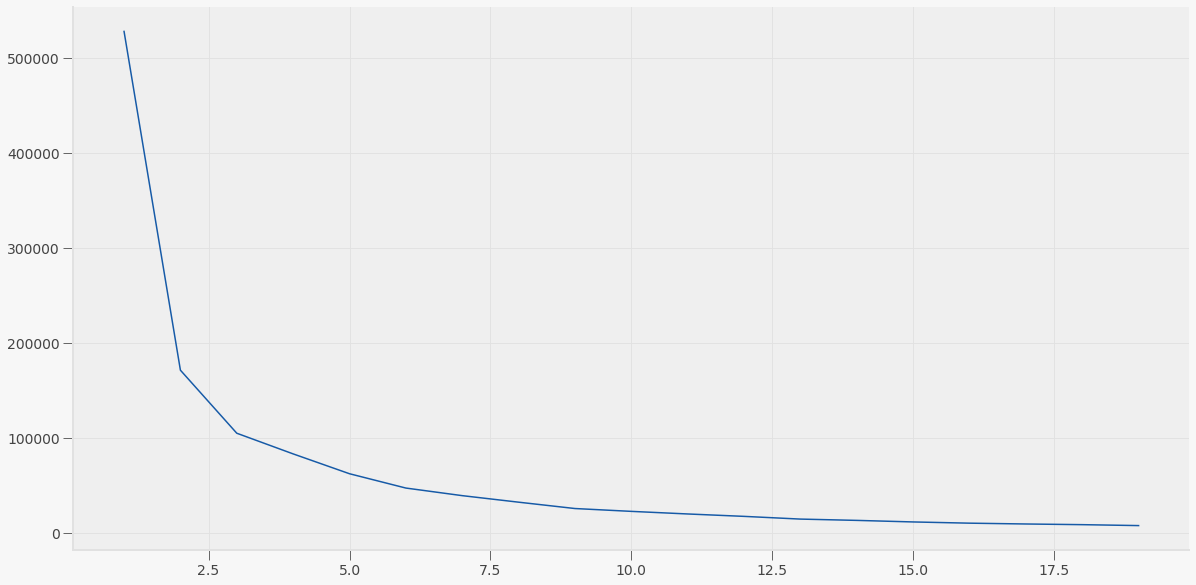

In [244]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10))
plt.plot(range(1,20), wcss)
plt.show()

El códo se encuentra en 3 

In [156]:
k = 14
kmeans = KMeans(n_clusters=k, max_iter=100000)
y_pred = kmeans.fit(gdf[['latitude', 'longitude']])

In [157]:
gdf['centro_distribucion']=y_pred.labels_
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates,centro_distribucion
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423),2
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455),2
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287),2
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015),2
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606),2


In [151]:
y_pred.cluster_centers_

array([[  37.35456854,  -78.14998693],
       [  33.90549928, -116.10229923],
       [  41.38523773,  -88.04040355],
       [  31.86131703,  -96.37041927],
       [  46.390668  , -121.36702948],
       [  41.29268623,  -73.70583532],
       [  20.94542771, -157.31225085],
       [  37.84011298, -121.50109518],
       [  39.43875809, -106.79341373],
       [  33.7239243 ,  -85.85216346],
       [  27.85124528,  -81.34110223],
       [  43.27680195,  -94.15171884],
       [  41.06854586,  -82.37995595],
       [  61.31264473, -149.6767927 ]])

In [153]:
y_pred.cluster_centers_

array([[  37.35456854,  -78.14998693],
       [  33.90549928, -116.10229923],
       [  41.38523773,  -88.04040355],
       [  31.86131703,  -96.37041927],
       [  46.390668  , -121.36702948],
       [  41.29268623,  -73.70583532],
       [  20.94542771, -157.31225085],
       [  37.84011298, -121.50109518],
       [  39.43875809, -106.79341373],
       [  33.7239243 ,  -85.85216346],
       [  27.85124528,  -81.34110223],
       [  43.27680195,  -94.15171884],
       [  41.06854586,  -82.37995595],
       [  61.31264473, -149.6767927 ]])

In [173]:
df_centros_distribucion=pd.DataFrame(y_pred.cluster_centers_)
df_centros_distribucion.columns = ['latitude', 'longitude']

df_centros_distribucion["Coordinates"] = list(zip(df_centros_distribucion.longitude, df_centros_distribucion.latitude))
df_centros_distribucion["Coordinates"] = df_centros_distribucion["Coordinates"].apply(Point)
df_centros_distribucion.head()

,latitude,longitude,Coordinates
0,40.477487,-107.032825,POINT (-107.03282487567567 40.47748734324324)
1,41.302645,-73.686142,POINT (-73.68614202014135 41.30264459151943)
2,33.745179,-85.826928,POINT (-85.82692789849624 33.745179363157895)
3,41.398993,-88.019946,POINT (-88.0199463367647 41.39899287843137)
4,46.283769,-121.517195,POINT (-121.51719480704226 46.283768612676056)


In [202]:
gdf_c['numero']=gdf_c.index

In [203]:
gdf_c = gpd.GeoDataFrame(df_centros_distribucion, geometry="Coordinates")
gdf_c.head()

,latitude,longitude,Coordinates,numero
0,40.477487,-107.032825,POINT (-107.03282 40.47749),0
1,41.302645,-73.686142,POINT (-73.68614 41.30264),1
2,33.745179,-85.826928,POINT (-85.82693 33.74518),2
3,41.398993,-88.019946,POINT (-88.01995 41.39899),3
4,46.283769,-121.517195,POINT (-121.51719 46.28377),4


In [198]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")
#location = geolocator.reverse("40.477487, -107.032825")
#print(location.address)

County Road 205, McGregor, Routt County, Colorado, United States


## Direcciones de centros de distribución 

In [240]:
centros=[]
for n in range(0,gdf_c.shape[0]):
  #location = geolocator.reverse("40.477487, -107.032825")
  str="%s , %s" % (gdf_c.iloc[n]['latitude'], gdf_c.iloc[n]['longitude'])
  location = geolocator.reverse(str)
  #centros.append([{'centro':n},{'latitude':gdf_c.iloc[n]['latitude']},{'longitude':gdf_c.iloc[n]['longitude'] }, {'direccion':location} ])
  print(50*"-")
  print('centro:',n, '   latitude:',gdf_c.iloc[n]['latitude'].round(4), '   longitude:',gdf_c.iloc[n]['longitude'].round(4), '   Direccion:',location)



--------------------------------------------------
centro: 0    latitude: 40.4775    longitude: -107.0328    Direccion: County Road 205, McGregor, Routt County, Colorado, United States
--------------------------------------------------
centro: 1    latitude: 41.3026    longitude: -73.6861    Direccion: Town of Somers, Westchester County, New York, 10526, United States
--------------------------------------------------
centro: 2    latitude: 33.7452    longitude: -85.8269    Direccion: Airport Road, Calhoun County, Alabama, 36206, United States
--------------------------------------------------
centro: 3    latitude: 41.399    longitude: -88.0199    Direccion: 26862, Cherry Hill Road, Will County, Illinois, 60442, United States
--------------------------------------------------
centro: 4    latitude: 46.2838    longitude: -121.5172    Direccion: Muddy Meadows Trail, Yakima County, Washington, United States
--------------------------------------------------
centro: 5    latitude: 27.8512

## A cuantas tiendas va a distribuir cada centro

In [158]:
gdf['centro_distribucion'].value_counts()


1     282
7     216
3     204
10    196
8     178
11    152
9     142
2     134
5     120
0      74
4      71
12     59
6       8
13      3
Name: centro_distribucion, dtype: int64

## Gráfica de tiendas y centros de distribución asociados 

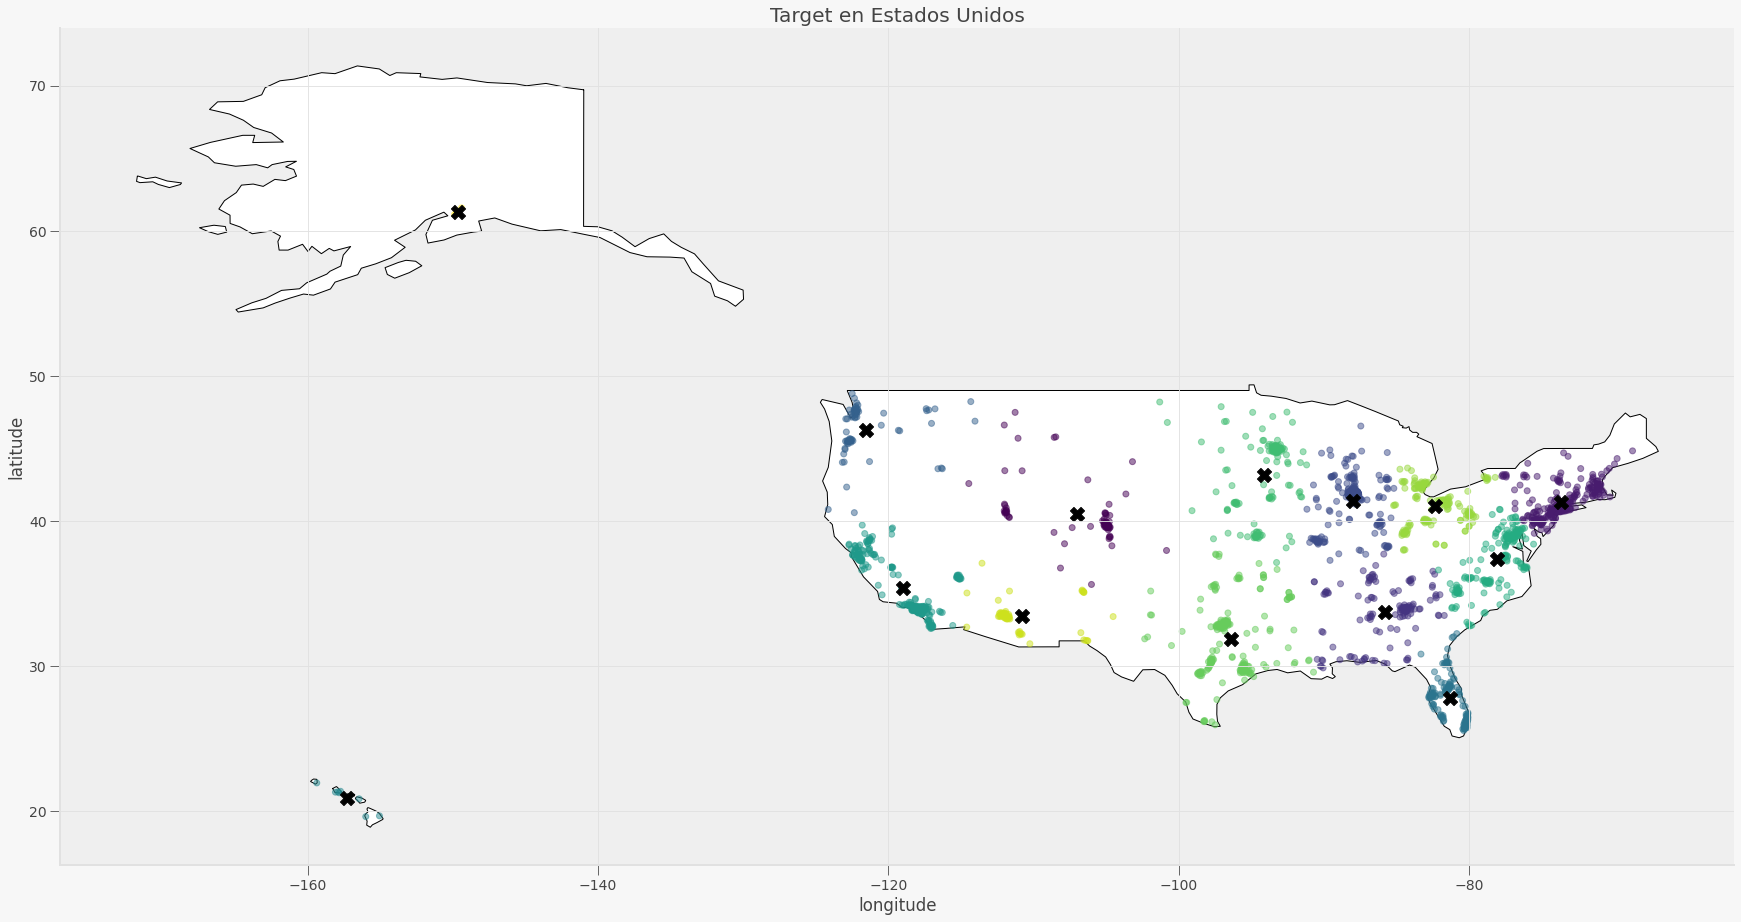

In [206]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(30,20))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, alpha = 0.5, column='centro_distribucion')
gdf_c.plot(ax=gax ,color='k', marker='X', markersize=200)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

## Elección del número de almacenes 

El número de almacenes lo elegi viendo en el mapa la distribucion de las tiendas, intente usar el codo de la gráfica pero esta da 3, pienso que es los 3 grandes grupos de estados unidos continental, Alaska y Hawaí. 



## Librerías gráficas

Me gusto mucho la libreria de geopandas, creo que es una manera fácil de usar coordenadas geográficas. Creo que es muy importante gráficar este típo de datos para poder entenderlos. 


## Concluciones

Creo que en el mapa se ve muy bien segmentado, pero necesita mas trabajo de analisis de distancias y de geografía, es posible que existan distancias cortas entre algunos puntos en linea recta pero que la orografia no permita la comunicación, por ejemplo en dos puntos cercanos pero separados por el cañon del colorado que probablemente en la practica requiera que estos puntos tengan disferentes almacenes.